In [1]:
import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt

import sympy as sp
import scipy as sc

from numba import jit

plt.style.use(['science', 'notebook', 'grid'])

# TP Auto-induction

Le but est de mesurer la valeur de l'inductance.

Pour cela, on a mesurer la tension efficace pour plusieurs fréquences ainsi que l'intervalle de temps, ce qui permet de calculer le déphasage.

On sait que $\Delta \phi = \omega \Delta t$ et $\omega = 2 \pi f$.

Ayant cela et les résistances totales, on a pu calculer l'inductance $L$ par $\tan (\Delta \phi) = \frac{\omega L}{R_{tot}}$.

## Étape 1 : créations des fonctions de calcul

Calcul de $\omega$.

In [2]:
puls_from_freq = lambda f: f*2*np.pi

Calcul de $\Delta \phi$.

In [3]:
phi_from_time = lambda t, f: puls_from_freq(f)*t

Calcul de $L$.

In [4]:
calc_l = lambda w, phi, R: np.tan(phi)*R/w

Calcul de $I$.

In [5]:
calc_I = lambda l, w, R, U: U/np.sqrt(R**2 + (w*l)**2)

In [6]:
def calc_all(R, f, U, dT):
    w = puls_from_freq(f)
    phi = phi_from_time(dT, f)
    l = calc_l(w, phi, R)
    I = calc_I(l, w, R, U)
    l_avg = np.mean(l)
    return w, phi, l, I, l_avg

In [7]:
def plot_I(f, I):
    plt.figure(figsize=(8, 6))

    plt.plot(f, I, 'x-')

    plt.hlines(I[0], 0, 10**4.2, linestyles='--', colors='r')

    m = (np.log10(I[-2]) - np.log10(I[-1])) / (np.log10(f[-2])- np.log10(f[-1]))
    h = np.log10(I[-1]) - m * np.log10(f[-1])
    line_x = 10**np.linspace(0, 4.2, 1000)
    line_y = 10**(m*np.linspace(0, 4.2, 1000) + h)
    cond = np.argwhere(line_y < I[0] * 1.2)

    plt.plot(line_x[cond], line_y[cond], '--', color='r')

    plt.xlabel(r'$f$ [Hz]')
    plt.ylabel(r'$I$ [A]')

    plt.yscale('log')
    plt.xscale('log')

    equal = np.isclose(line_y, I[0], atol=0.1)
    closer = [1,1]
    near_x = line_x[equal]
    near_y = line_y[equal]
    for i in range(len(near_x)):
        if np.abs(near_y[i] - I[0]) < closer[1]:
            closer = [near_x[i], near_y[i]]

    print(closer)
        

    plt.show()

In [8]:
def plot_phi(f, phi):
    plt.figure(figsize=(8, 6))

    plt.plot(f, phi, 'x-')

    plt.xlabel(r'$f$ [Hz]')
    plt.ylabel(r'$\phi$ [rad]')

    plt.xscale('log')

    plt.show()

# Étape 2 : conditions initiales

In [9]:
R_1 = 5 # Ohm
f_1 = np.array([10.03,20.82,50.43,110.3,213.3,509.2,1072,2160,5035,10150]) # Hz
U_1 = np.array([5.6,5.64,5.56,5.4,4.96,3.48,2,1.04,0.464,0.226]) # V
del_T1 = np.array([0,0.4,0.3,0.36,0.4,0.28,0.19,0.11,0.046,0.024])/1e3 # s

In [10]:
R_2 = 50 # Ohm
f_2 = np.array([10.32,21.03,49.58,119,217.8,505.3,1187,2170,5045,10680]) # Hz
U_2 = np.array([8.32,8.32,8.32,8.32,8.16,8,7.68,6.52,4,2.06]) # V
del_T2 = np.array([0,0.4,0.1,0.08,0.08,0.05,0.056,0.048,0.035,0.02])/1e3 # s

## Calculs

### Exp. 1

In [11]:
w1, phi1, l1, I1, l_avg1 = calc_all(R_1, f_1, U_1, del_T1)

In [12]:
l_avg1

0.002002138711278661

[827.4041935668218, 1.029680812674386]


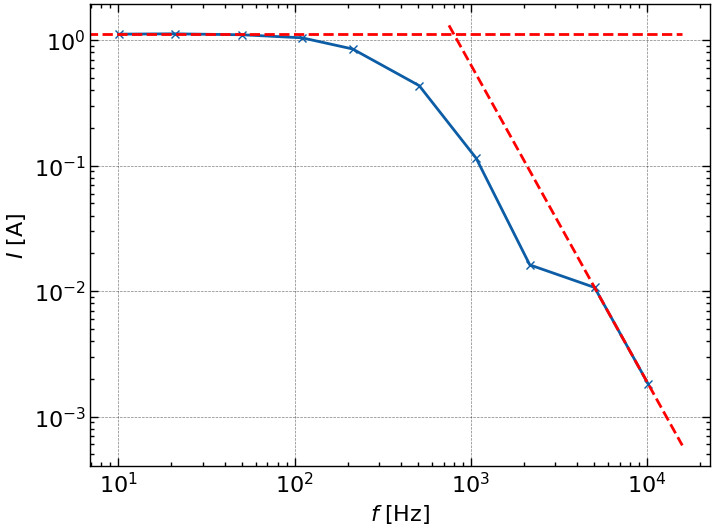

In [13]:
plot_I(f_1, I1)

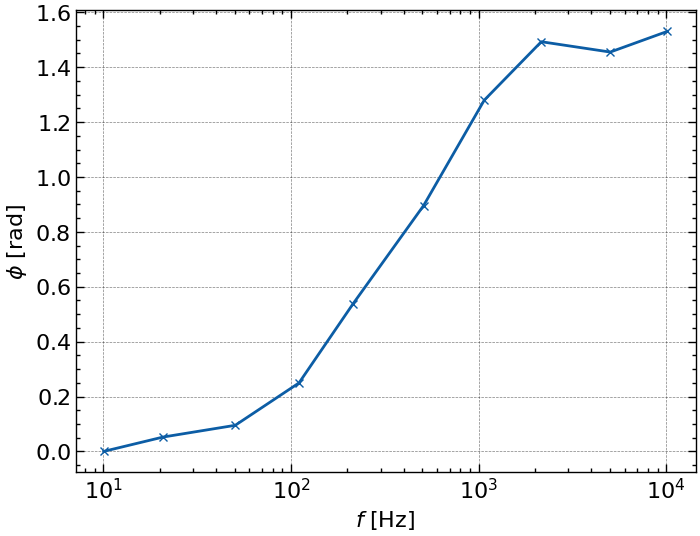

In [14]:
plot_phi(f_1, phi1)

### Exp. 2

In [15]:
w2, phi2, l2, I2, l_avg2 = calc_all(R_2, f_2, U_2, del_T2)

In [16]:
l_avg2

0.0047724875578564925

[3147.008369301856, 0.08266905267700747]


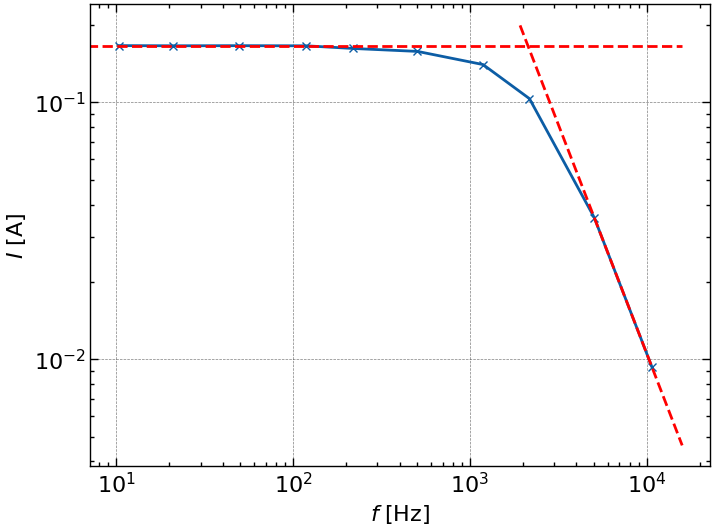

In [17]:
plot_I(f_2, I2)

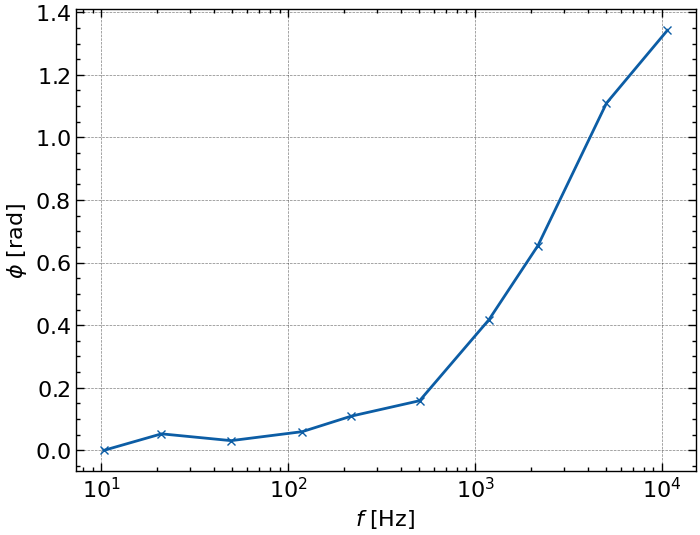

In [18]:
plot_phi(f_2, phi2)

# Divers

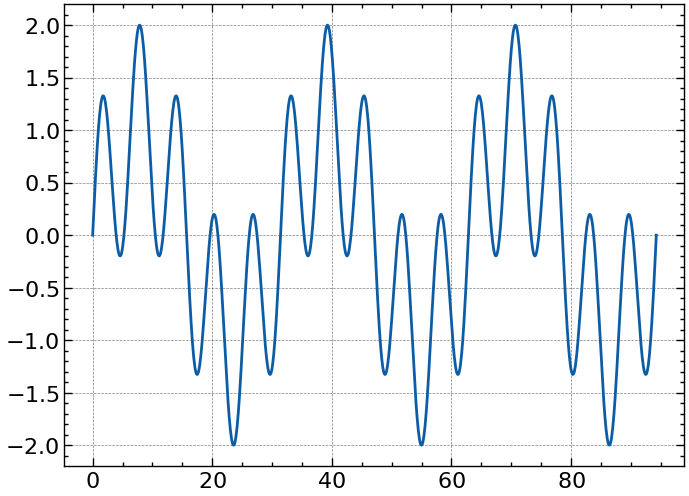

In [33]:
plt.figure(figsize=(8, 6))
t = np.linspace(0, 30*np.pi, 1000)
plt.plot(t, np.sin(t) + np.sin(t/5))